In [55]:
import fitz
import numpy as np

# 打开PDF文件
pdf_name = "combined_2pi_ePeM_to_piPpiM_0,3-0,72GeV_dhmz19_.pdf"
pdf_page_index = 0  # 我们将提取第一页

# 打开PDF文件并提取指定页
pdf_document = fitz.open(pdf_name)
page = pdf_document.load_page(pdf_page_index)

# 获取页面的像素数据
pix = page.get_pixmap()

# 转换像素数据为Numpy数组
img_array = np.frombuffer(pix.samples, dtype=np.uint8).reshape(
    pix.height, pix.width, pix.n)

# 找到非白色像素的上边界和下边界
non_white_rows = np.any(img_array < 255, axis=2)
top_boundary = np.argmax(non_white_rows, axis=0)
bottom_boundary = img_array.shape[0] - \
    np.argmax(np.flip(non_white_rows, axis=0), axis=0)

# 获取只包含y值的上边界和下边界数组
y_values_top = pix.height-top_boundary[top_boundary != 0]
y_values_bottom = pix.height-bottom_boundary[bottom_boundary != pix.height]
y_values_center = (y_values_top+y_values_bottom)/2
y_values_err = y_values_top-y_values_bottom

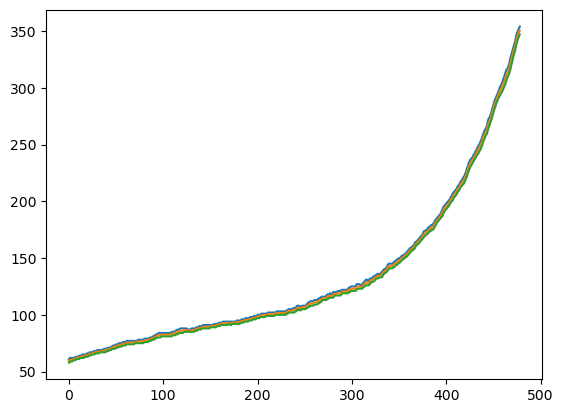

In [56]:
import matplotlib.pyplot as plt
plt.plot(y_values_top)
plt.plot(y_values_center)
plt.plot(y_values_bottom)


In [ ]:
import pandas as pd
df = pd.DataFrame({"x": [2, 3], "y": [3, 6]}, "err": )


In [60]:
df.to_csv(pdf_name+".csv")


In [36]:
# (0.3,18.415)
# (0.72,1059.908)
###
# (0.72, 1059.908)
# (0.81,687.648)
##
# (0.81,687.648)
# (0.98,72.868)
##
# (0.98,72.868)
# (2,0.472)

0.4716981132075482